#Installing dependencies

In [2]:
!apt-get install -y tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


#installing libraries

In [3]:
import cv2
import pytesseract
import numpy as np
from google.colab.patches import cv2_imshow


#Image Preprocessing Function

In [4]:
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Remove noise
    denoised = cv2.fastNlMeansDenoising(gray)

    # Apply Otsu’s thresholding (binary image)
    _, thresh = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return thresh


#Run OCR and Get Bounding Boxes

In [5]:
def get_text_boxes(image):
    # pytesseract with output as dictionary
    details = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
    return details


#Draw Rectangles on Detected Text

In [6]:
def draw_boxes(image, ocr_data, min_conf=60):
    output = image.copy()
    n_boxes = len(ocr_data['level'])

    for i in range(n_boxes):
        if int(ocr_data['conf'][i]) > min_conf:
            x, y, w, h = (ocr_data['left'][i], ocr_data['top'][i],
                          ocr_data['width'][i], ocr_data['height'][i])
            cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return output


#Extract Text Only

In [7]:
def extract_text(ocr_data, min_conf=60):
    words = []
    for i, word in enumerate(ocr_data['text']):
        if int(ocr_data['conf'][i]) > min_conf and word.strip() != "":
            words.append(word)
    return " ".join(words)


#Test the Pipeline with an Image

Original Image:


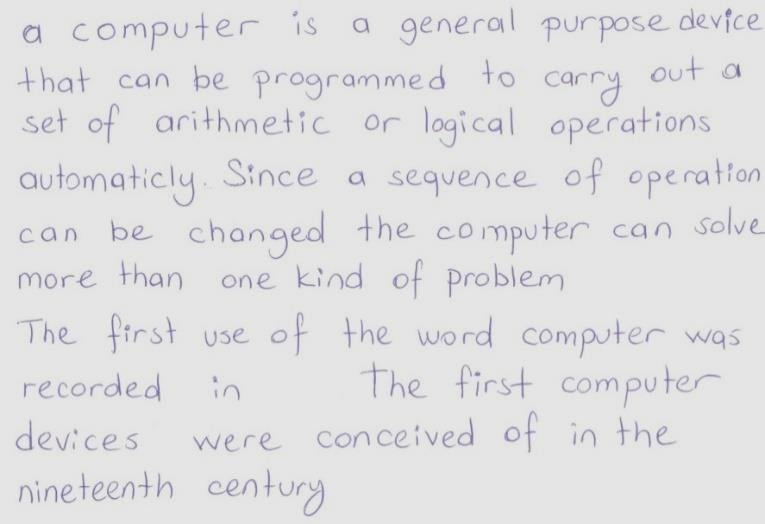


Detected Regions:


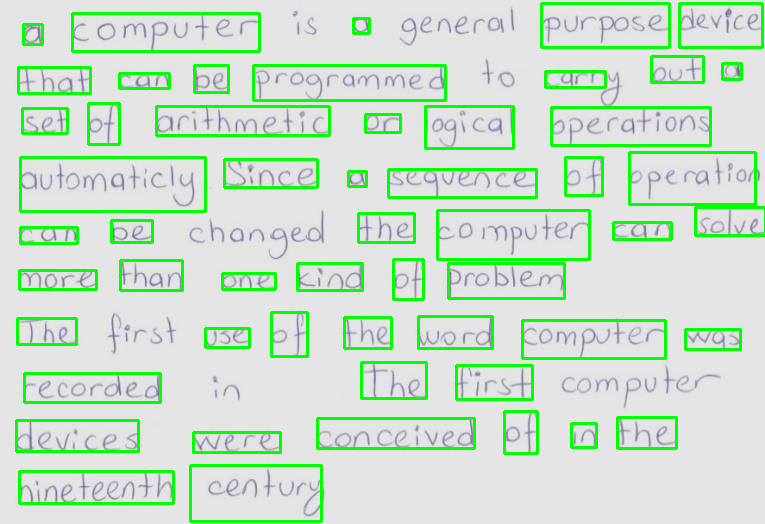


Extracted Text:
 a computer a purpose. device that can be programmed carry out a set of arithmetic or legical operations automaticly. Since a sequence of operation can be the computer can Solve more than one kind of problem The yse of the word computer was recorded The first devices were conceived of in the nineteenth century


In [ ]:
# Example path (change if needed)
img_path = "/content/testing.jpg"

# Load image
image = cv2.imread(img_path)

if image is None:
    print("❌ Error: Could not load image")
else:
    # Show original
    print("Original Image:")
    cv2_imshow(image)

    # Step 1: Preprocess
    preprocessed = preprocess_image(image)

    # Step 2: Run OCR
    ocr_data = get_text_boxes(preprocessed)

    # Step 3: Draw boxes
    boxed_img = draw_boxes(image, ocr_data)

    print("\nDetected Regions:")
    cv2_imshow(boxed_img)

    # Step 4: Extract text
    text_result = extract_text(ocr_data)
    print("\nExtracted Text:\n", text_result)
